In [1]:
import pandas as pd
import numpy as np
import os
import sys
import gget 

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/direct_RNA/counts/merged.counts.txt"

df = pd.read_csv(fpath, sep="\t", header=None)
df.columns = ['geneId', 'read_count']
print(f"{df.shape=}")
print()
print(df['read_count'].sum())
print(df['read_count'].mean())
print((df['read_count'] == 0).astype(int).sum(axis=0))
df.head()

df.shape=(61865, 2)

630478
10.191190495433606
49450


,geneId,read_count
0,ENSG00000000003,14
1,ENSG00000000005,0
2,ENSG00000000419,26
3,ENSG00000000457,1
4,ENSG00000000460,11


In [16]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/direct_RNA/counts/merged_total.counts.txt"

df = pd.read_csv(fpath, sep="\t", header=None)
df.columns = ['geneId', 'read_count']
print(f"{df.shape=}")
print()
print(df['read_count'].sum())
print(df['read_count'].mean())
print((df['read_count'] == 0).astype(int).sum(axis=0))
df.head()

df.shape=(61865, 2)

390093
6.305552412511113
52714


,geneId,read_count
0,ENSG00000000003,10
1,ENSG00000000005,0
2,ENSG00000000419,3
3,ENSG00000000457,0
4,ENSG00000000460,2


In [3]:
geneNamePath = "/scratch/indikar_root/indikar1/cstansbu/direct_RNA/references/geneNames.csv"
gdf = pd.read_csv(geneNamePath)
print(f"{gdf.shape=}")

gdf = gdf[gdf['transcriptName'].isna()]
gdf = gdf[['geneId', 'geneName', 'geneBiotype']]
print(f"{gdf.shape=}")

gdf.head()

gdf.shape=(262041, 5)
gdf.shape=(41407, 3)


,geneId,geneName,geneBiotype
0,ENSG00000160072,ATAD3B,protein_coding
7,ENSG00000225972,MTND1P23,unprocessed_pseudogene
9,ENSG00000224315,RPL7P7,processed_pseudogene
11,ENSG00000198744,MTCO3P12,unprocessed_pseudogene
13,ENSG00000279928,DDX11L17,unprocessed_pseudogene


In [4]:
# merge the gene data
df = pd.merge(df, gdf, 
              how='left',
              left_on='geneId',
              right_on='geneId')

df.head()

,geneId,read_count,geneName,geneBiotype
0,ENSG00000000003,14,TSPAN6,protein_coding
1,ENSG00000000005,0,TNMD,protein_coding
2,ENSG00000000419,26,DPM1,protein_coding
3,ENSG00000000457,1,SCYL3,protein_coding
4,ENSG00000000460,11,C1orf112,protein_coding


In [5]:
pdf = df[df['read_count'] > 0]
print(f"{pdf.shape=}")
pdf['geneBiotype'].value_counts()

pdf.shape=(12415, 4)


geneBiotype
protein_coding                        10626
lncRNA                                  571
processed_pseudogene                    411
transcribed_unprocessed_pseudogene      101
transcribed_processed_pseudogene         41
unprocessed_pseudogene                   29
transcribed_unitary_pseudogene           21
rRNA                                      8
snRNA                                     5
miRNA                                     5
Mt_tRNA                                   4
misc_RNA                                  2
Mt_rRNA                                   2
snoRNA                                    2
scRNA                                     1
TR_C_gene                                 1
TR_V_gene                                 1
translated_unprocessed_pseudogene         1
Name: count, dtype: int64

<AxesSubplot: xlabel='read_count', ylabel='Count'>

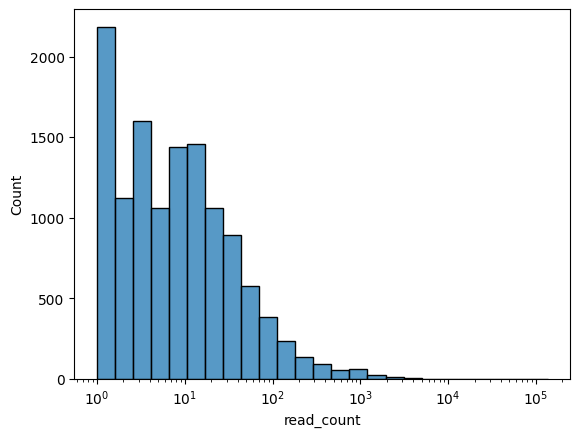

In [6]:
sns.histplot(data=pdf,
             x='read_count', 
             log_scale=True,
             bins=25)

In [7]:
def getGenes(pdf, cellType, ui_upper=None):
    genes = pdf[pdf['cell type'] == cellType]
    
    if not ui_upper is None:
        genes = genes[genes['ubiquitousness index'] < ui_upper]
        
    return genes['official gene symbol'].to_list()


pdfPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/panglaodb/pandb.tsv.gz"
pandDf = pd.read_csv(pdfPath, sep="\t")
    
fbList = getGenes(pandDf, 'Fibroblasts')
len(fbList)

179

gx.shape=(119, 4)


,geneId,read_count,geneName,geneBiotype
452,ENSG00000026025,3934,VIM,protein_coding
11410,ENSG00000164692,2113,COL1A2,protein_coding
3590,ENSG00000108821,1520,COL1A1,protein_coding
4141,ENSG00000113140,1264,SPARC,protein_coding
16980,ENSG00000196154,829,S100A4,protein_coding


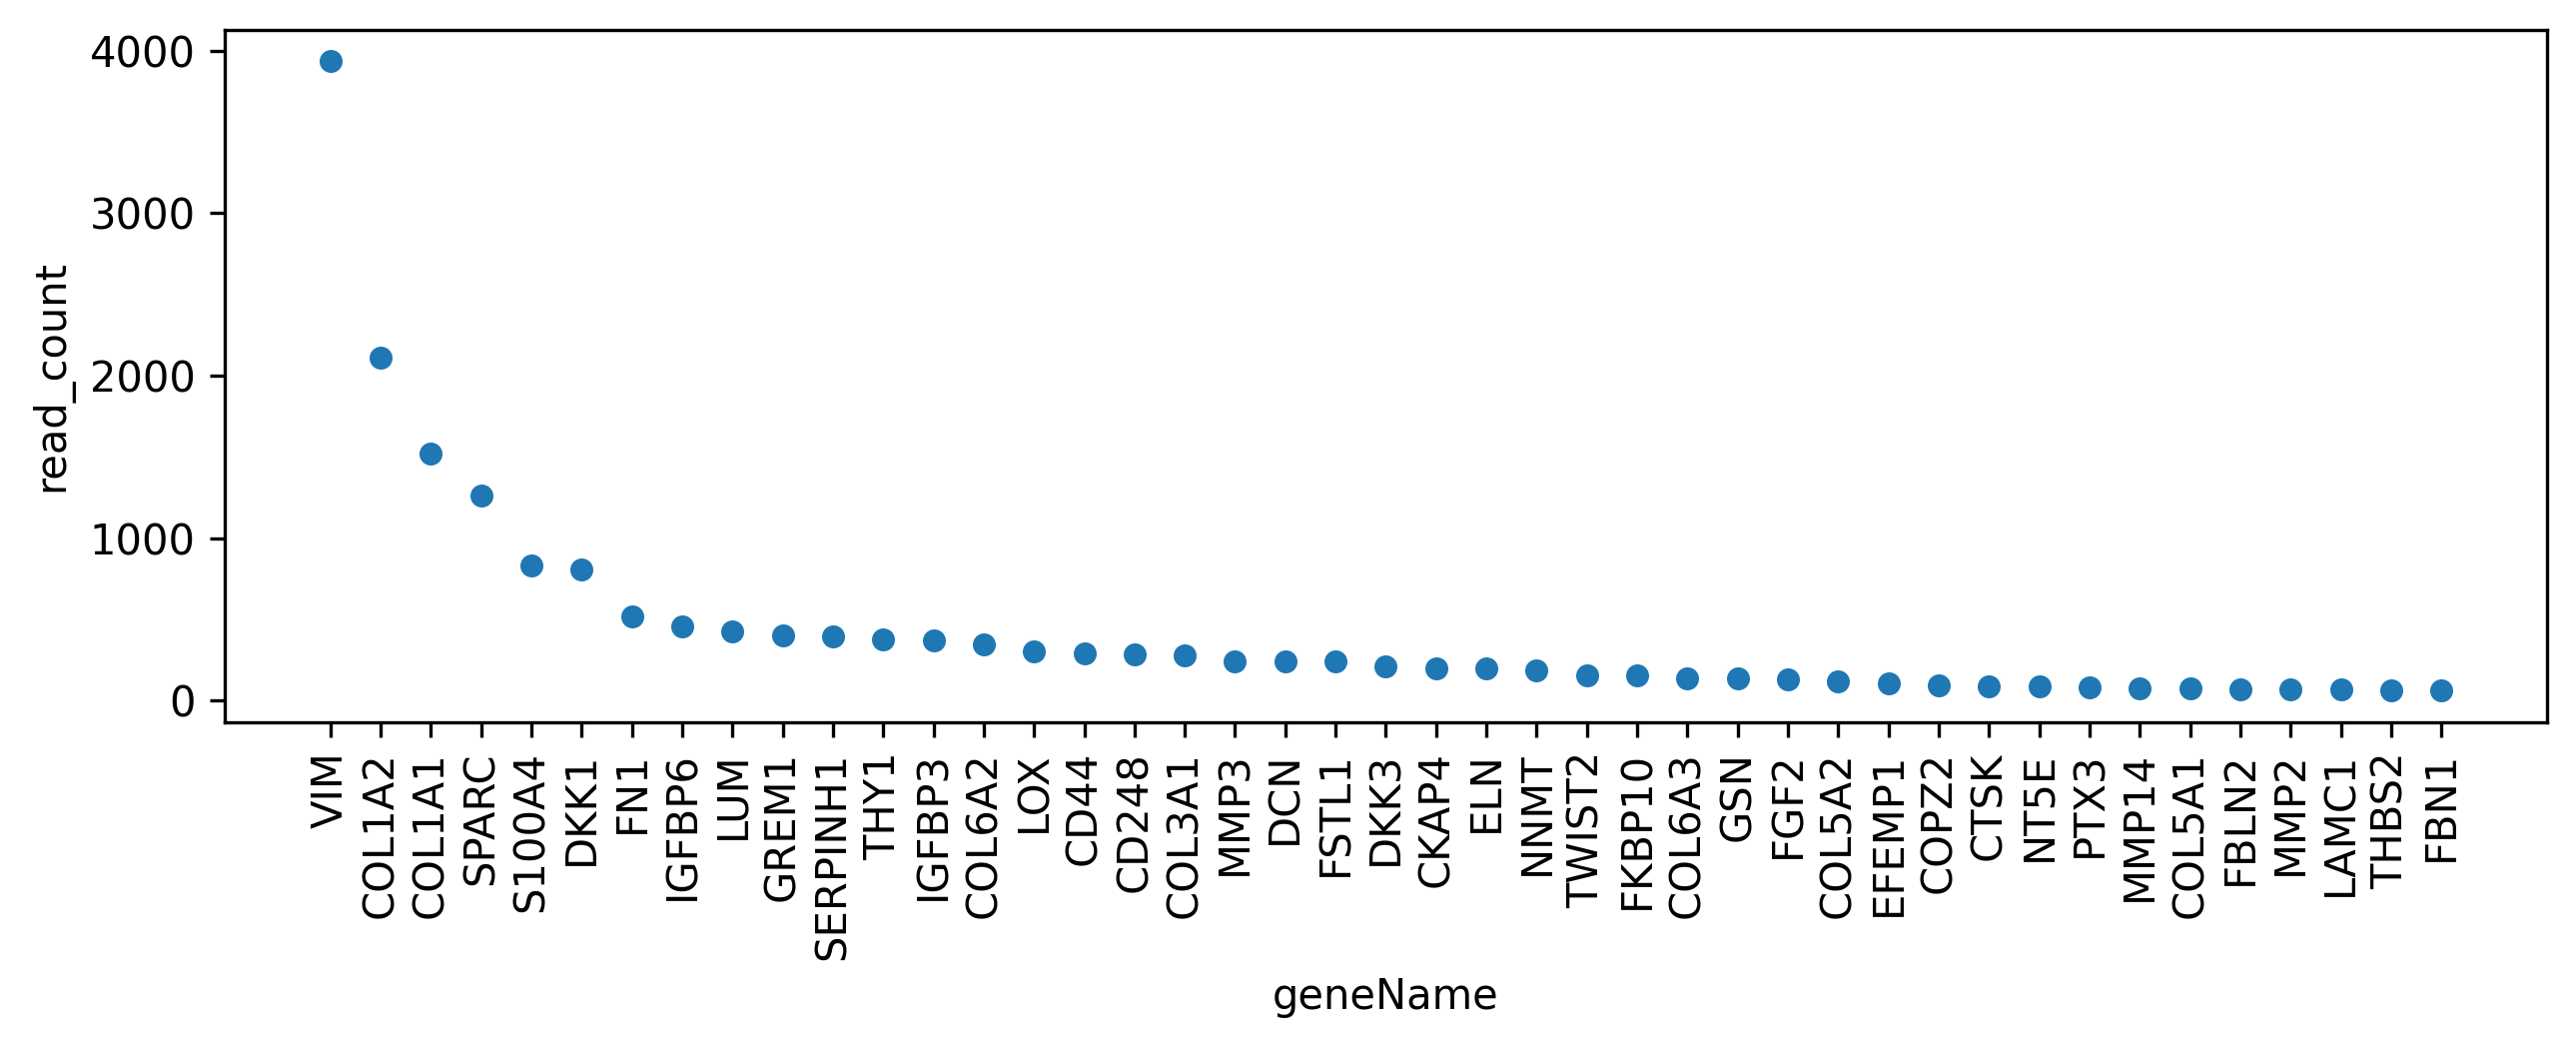

In [8]:
gx = pdf[pdf['geneName'].isin(fbList)]
print(f"{gx.shape=}")

t = 60

gx = gx.sort_values(by='read_count', ascending=False)
gx = gx[gx['read_count'] > t]

plt.rcParams['figure.figsize'] = 10,3
plt.rcParams['figure.dpi'] = 300

sns.scatterplot(data=gx,
                x='geneName',
                y='read_count')

plt.gca().tick_params(axis='x', rotation=90)

gx.head()

In [9]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
t = 200
gf = pdf[pdf['read_count'] > t]
print(f"{gf.shape=}")
gf.head()

In [ ]:
# db = 'ontology'
# db = "HDSigDB_Human_2021" # interesting results
db = "PanglaoDB_Augmented_2021"
# db = "Reactome_2022"
# db = 'WikiPathway_2021_Human'


queryGenes = gf['geneName']
ef = gget.enrichr(queryGenes, database=db)

pd.options.display.max_colwidth = 100
ef[['path_name', 'adj_p_val', 'overlapping_genes']].head(15)